In [8]:
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [10]:
df=pd.read_csv("resistance_data_20172021-v4.csv",delimiter=",",index_col=0)
df['AGE']=2022-df['AGE']
labelencoder = LabelEncoder()
encoder = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

Define Precision-recall / ROC curve plot

In [3]:
def PRCplot(clf,y_score,y_probs,y_test,sampling,model_name):
    precision=0
    recall=0
    thresholds=0
    #PRC_Recall CURVE
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    display_PRC = PrecisionRecallDisplay.from_predictions(y_test, y_probs, name=model_name+sampling)
    #precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    #display_PRC = PrecisionRecallDisplay.from_predictions(y_test, y_score, name=model_name)
    ns=np.sum(y_test) #số giá trị R/tập test
    n=len(y_test) #số lượng y_test
    plt.plot([0, 1], [ns/n,ns/n], linestyle = '--')
    plt.xlabel('Recall', fontsize = 12)
    plt.ylabel('Precision', fontsize = 12)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.show()
    return precision, recall

def ROCplot(clf,y_score,y_probs,y_test,sampling,model_name):

    fpr, tpr, _ = (0,0,0)
    #fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=clf.classes_[1])
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
    roc_auc = metrics.auc(fpr, tpr)
    display_ROC = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=model_name+sampling)
    display_ROC.plot()
    plt.xlabel('False Positive Rate',fontsize = 12)
    plt.ylabel('True Positive Rate',fontsize = 12)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.show()

GetData with desired bacteria_group and desired Antibiotics name

In [14]:
def GetData(ANname,bacteriagroup):
    temp=df[df[ANname].isin(['R','S'])]
    df_1=temp[temp['BACTERIA_GROUP']==bacteriagroup]
    X_cat=df_1.iloc[:,[9,12,25]]
    X_clf=df_1.iloc[:,[2,3,13,14,15,16,17,18,19,20,21,22,23]]
    Y=df_1[ANname]
    #Y.head()
    encoder_df = encoder.fit_transform(X_cat).toarray()
    clean_X=np.array(X_clf)

    c = 1000
    for i in range(0,13):
        clean_X[:,i] = labelencoder.fit_transform(clean_X[:,i])
    clean_X=np.concatenate((clean_X,encoder_df),axis=1)
    clean_Y = 1-np.array(labelencoder.fit_transform(np.array(Y))) #Set R=1; S=0
    return clean_X,clean_Y



Stratified sampling


In [5]:
def StratSampling(clean_X,clean_Y):
    x_train, x_test, y_train, y_test = train_test_split(clean_X, clean_Y, test_size=0.2, random_state=42,stratify=clean_Y)
    x_train_std = sc.fit_transform(x_train)
    x_test_std = sc.transform(x_test)
    return x_train_std,x_test_std,y_train,y_test

Data resampling (if needed)

In [6]:
def Datasampling(method,x,y):
    x_resampled=0
    y_resampled=0
    if (method=="over"):
        x_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(x, y)
    elif (method=="under"):
        x_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_resample(x, y)
    else:
        x_resampled=x
        y_resampled=y
    return x_resampled, y_resampled 

Data training and evaluation

normal sampling
Logistic Regression 
cross-validation mean: 0.53
Training accuracy: 0.875
Test accuracy: 0.87
Precision:  0.6612239034667688
Recall:  0.5663422131147541
MCC: 0.206842


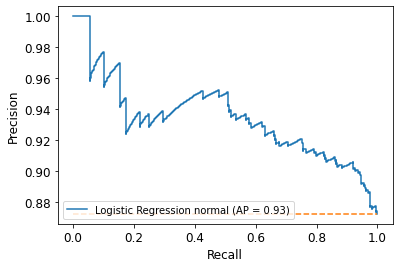

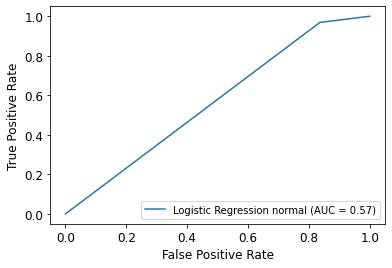

SVM 
cross-validation mean: 0.47
Training accuracy: 0.873
Test accuracy: 0.87
Precision:  0.43592436974789917
Recall:  0.4987980769230769
MCC: -0.017552


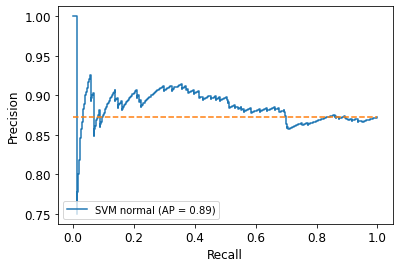

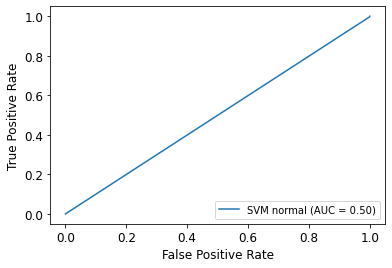

Decision Tree 
cross-validation mean: 0.69
Training accuracy: 0.927
Test accuracy: 0.82
Precision:  0.4510419980909959
Recall:  0.47574479823455235
MCC: -0.068920


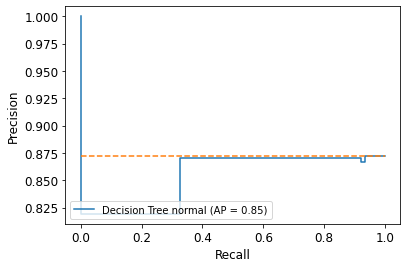

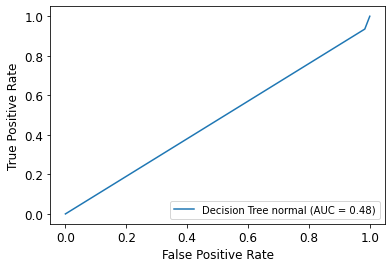

Random Forest 
cross-validation mean: 0.63
Training accuracy: 0.892
Test accuracy: 0.87
Precision:  0.4360587002096436
Recall:  0.5
MCC: 0.000000


d:\Anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


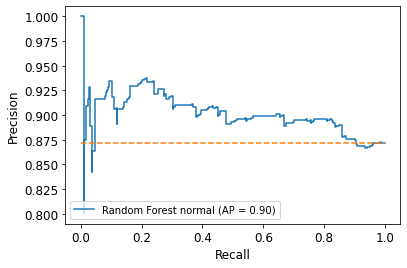

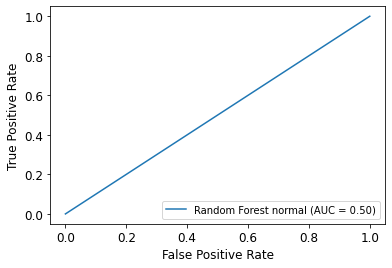

XGBoost 
cross-validation mean: 0.72
Training accuracy: 0.980
Test accuracy: 0.79
Precision:  0.4559934318555008
Recall:  0.46831651954602777
MCC: -0.074680


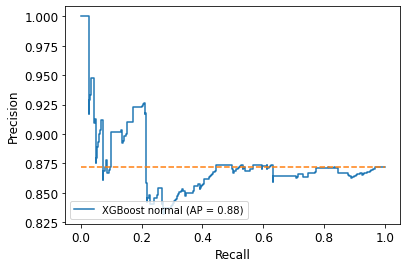

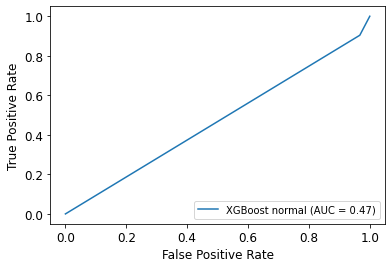

over sampling
Logistic Regression 
cross-validation mean: 0.72
Training accuracy: 0.724
Test accuracy: 0.54
Precision:  0.5594747410695413
Recall:  0.6330587957124842
MCC: 0.177917


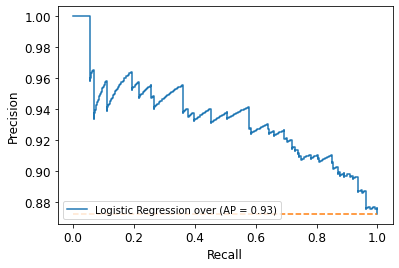

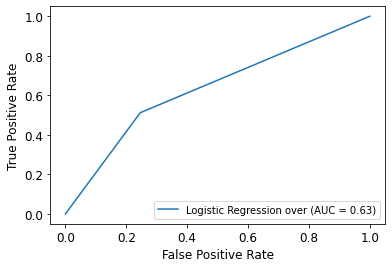

SVM 
cross-validation mean: 0.77
Training accuracy: 0.775
Test accuracy: 0.53
Precision:  0.4926001417936902
Recall:  0.48354744640605296
MCC: -0.022068


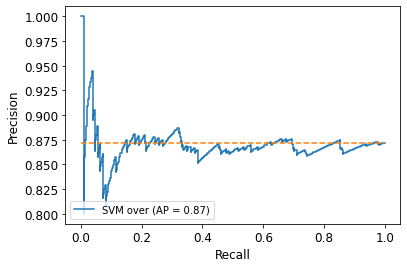

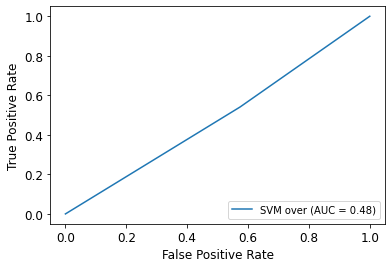

Decision Tree 
cross-validation mean: 0.90
Training accuracy: 0.949
Test accuracy: 0.76
Precision:  0.4705003734129948
Recall:  0.4688682219419924
MCC: -0.060609


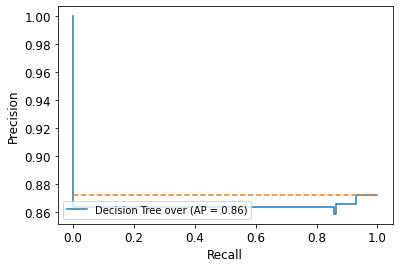

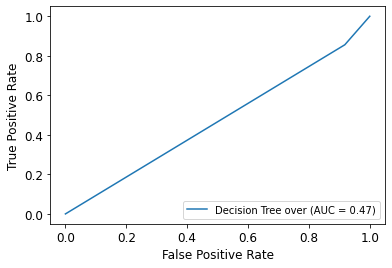

Random Forest 
cross-validation mean: 0.83
Training accuracy: 0.838
Test accuracy: 0.87
Precision:  0.4357894736842105
Recall:  0.49759615384615385
MCC: -0.024848


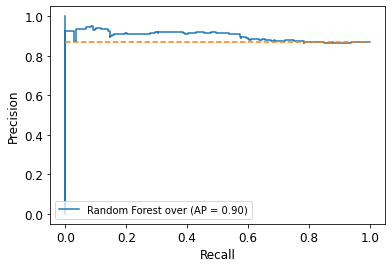

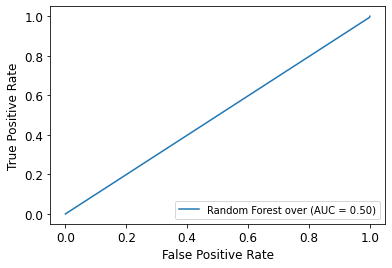

XGBoost 
cross-validation mean: 0.95
Training accuracy: 0.987
Test accuracy: 0.68
Precision:  0.540321583178726
Recall:  0.5770807061790668
MCC: 0.111499


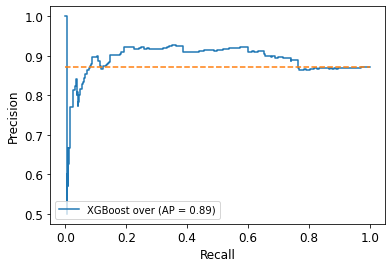

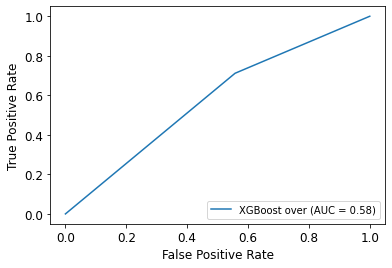

under sampling
Logistic Regression 


d:\Anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


cross-validation mean: 0.73
Training accuracy: 0.779
Test accuracy: 0.36
Precision:  0.5350254932387497
Recall:  0.5622635561160152
MCC: 0.093398


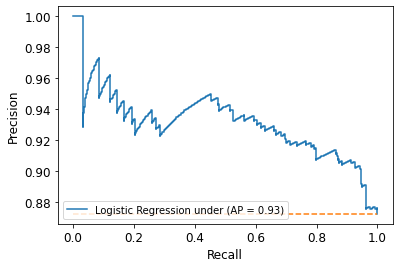

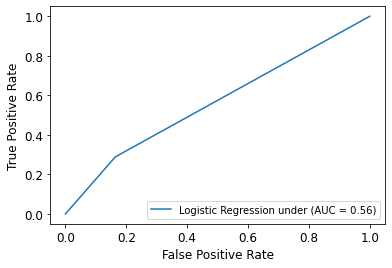

SVM 
cross-validation mean: 0.74
Training accuracy: 0.779
Test accuracy: 0.26
Precision:  0.520497512437811
Recall:  0.5243537200504413
MCC: 0.044685


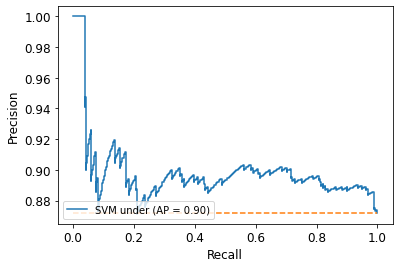

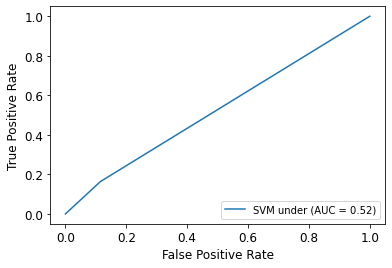

Decision Tree 
cross-validation mean: 0.72
Training accuracy: 0.851
Test accuracy: 0.63
Precision:  0.47749272953884503
Recall:  0.4573021752837327
MCC: -0.062000


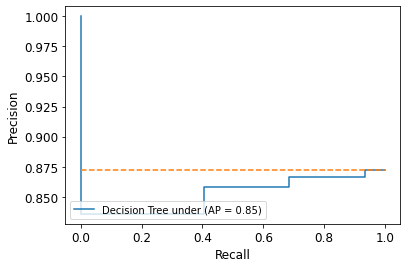

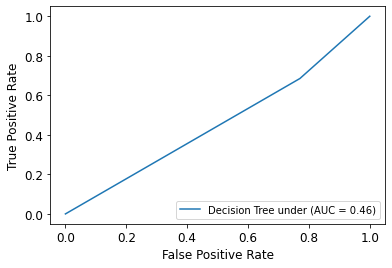

Random Forest 
cross-validation mean: 0.75
Training accuracy: 0.781
Test accuracy: 0.87
Precision:  0.43592436974789917
Recall:  0.4987980769230769
MCC: -0.017552


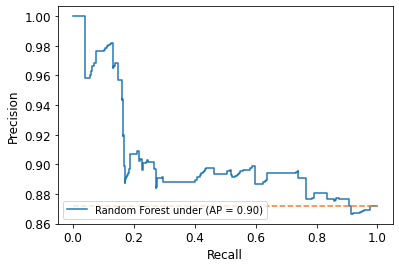

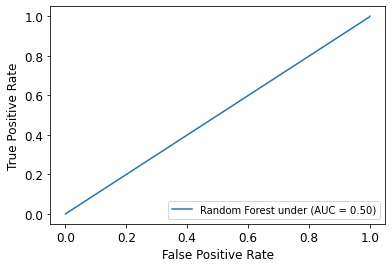

XGBoost 
cross-validation mean: 0.76
Training accuracy: 0.992
Test accuracy: 0.81
Precision:  0.4608843537414966
Recall:  0.4755280580075662
MCC: -0.061878


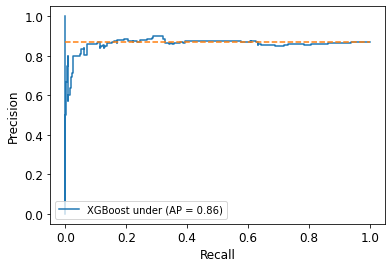

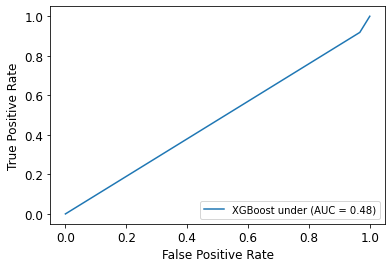

In [7]:
def Train(x_train,y_train,x_test,y_test):
    sampling=['normal']
    for sampling in sampling_method:
        print(sampling+' sampling')
        for model in range(0,5):
            print(model_name[model])
            x_sampling=np.array
            y_sampling=np.array
            x_sampling, y_sampling=Datasampling(sampling,x_train,y_train)
            clf = 0
            #--------models----------
            if model == 0:
                clf = LogisticRegression(penalty='l1', C=c, max_iter = 5000 ,multi_class='ovr',solver='saga',random_state=42)
            elif model == 1:
                #clf = svm.SVC(kernel='rbf',C=c,decision_function_shape='ovr',random_state=42,max_iter = 5000,probability=True)
                clf = svm.SVC(kernel='rbf',C=c,decision_function_shape='ovr',random_state=42,probability=True)
            elif model == 2:
                clf = DecisionTreeClassifier(random_state=42,min_samples_leaf=5)
                #,
            elif model == 3:
                clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=25,random_state=42)
            elif model == 4:
                #clf = XGBClassifier(num_class=1,n_estimators=100,learning_rate= 0.3, max_depth=6, subsample=1, gamma=0, reg_lambda=1, max_delta_step=0,colsample_bytree=1, 
                                    #min_child_weight=1, seed=1000, eval_metric='mlogloss')
                clf = XGBClassifier(num_class=1,n_estimators=100, subsample=1, 
                                    min_child_weight=1, seed=1000)                    
            
            clf.fit(x_sampling, y_sampling)
            scores = cross_val_score(clf, x_sampling, y_sampling, cv=10, scoring='f1_macro') #cross-validation
            #print('cross-validation :' ,scores)
            print('cross-validation mean: %.2f' % scores.mean())
            y_score = clf.predict(x_test_std)
            y_probs = clf.predict_proba(x_test_std)[:,1]
            print('Training accuracy: %.3f' % clf.score(x_sampling, y_sampling)) # Training accuracy
            print('Test accuracy: %.2f' % clf.score(x_test_std, y_test)) # Test accuracy
            print('Precision: ', precision_score(y_test, y_score, average='macro'))
            print('Recall: ', recall_score(y_test, y_score, average='macro'))
            print('MCC: %2f' % matthews_corrcoef(y_test, y_score))
            PRCplot(clf,y_score,y_probs,y_test,sampling,model_name[model])
            ROCplot(clf,y_score,y_probs,y_test,sampling,model_name[model])

In [15]:
#Main context
model_name = ['Logistic Regression ','SVM ','Decision Tree ','Random Forest ','XGBoost ']
sampling_method=['normal','over','under']
Antibiotics=['AMIKACIN','CEFOXITIN','CEFTAZIDIME','LEVOFLOXACIN','MEROPENEM','PIPERACILLIN_TAZOBACTAM','VANCOMYCIN']
bacteriagroup=['Staphylococcus spp.','Klebsiella spp.','Pseudomonas aeruginosa','Escherichia coli','Acinetobacter spp.']
bacteria='Staphylococcus spp.'
for bacteria in bacteriagroup:
    Antibiotic='AMIKACIN'
    for Antibiotic in Antibiotics:
        clean_X,clean_Y=GetData(Antibiotic,bacteria)


KeyError: 'PIPERACILLIN_TAZOBACTAM'